# **Data Loading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 23.3 MB/s eta 0:00:00


In [4]:
import pyreadr

# Read the RDS file
result = pyreadr.read_r('/content/drive/MyDrive/diabetes/Housing01.rds')  # Replace with the correct file path
data = result[None]  # Extract the DataFrame

# Display the dataset
data.to_csv('Housing01.csv', index=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47779 entries, 0 to 47778
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PIN           47779 non-null  object 
 1   tract         47779 non-null  int32  
 2   bg            47779 non-null  int32  
 3   tract.bg      47779 non-null  float64
 4   SaleAmt       47779 non-null  float64
 5   YearSold      47779 non-null  float64
 6   TotalBath     47779 non-null  float64
 7   BedroomsNbr   47779 non-null  float64
 8   FirePl        47779 non-null  float64
 9   LivingSqFt    47779 non-null  float64
 10  RoomsNbr      47779 non-null  float64
 11  Age           47779 non-null  float64
 12  LtArea        47779 non-null  float64
 13  Garage        47779 non-null  float64
 14  Med.Income    47779 non-null  float64
 15  Perc_18       47779 non-null  float64
 16  Educ_High     47779 non-null  float64
 17  Dist_cbd      47779 non-null  float64
 18  Park_Pct_5    47779 non-nu

# **Data Cleaning**

In [6]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each categorical column (if any exist)
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verify preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47779 entries, 0 to 47778
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PIN           47779 non-null  int64  
 1   tract         47779 non-null  int32  
 2   bg            47779 non-null  int32  
 3   tract.bg      47779 non-null  float64
 4   SaleAmt       47779 non-null  float64
 5   YearSold      47779 non-null  float64
 6   TotalBath     47779 non-null  float64
 7   BedroomsNbr   47779 non-null  float64
 8   FirePl        47779 non-null  float64
 9   LivingSqFt    47779 non-null  float64
 10  RoomsNbr      47779 non-null  float64
 11  Age           47779 non-null  float64
 12  LtArea        47779 non-null  float64
 13  Garage        47779 non-null  float64
 14  Med.Income    47779 non-null  float64
 15  Perc_18       47779 non-null  float64
 16  Educ_High     47779 non-null  float64
 17  Dist_cbd      47779 non-null  float64
 18  Park_Pct_5    47779 non-nu

In [7]:
data

,PIN,tract,bg,tract.bg,SaleAmt,YearSold,TotalBath,BedroomsNbr,FirePl,LivingSqFt,...,LtArea,Garage,Med.Income,Perc_18,Educ_High,Dist_cbd,Park_Pct_5,Park_Pct_10,Park_Pct_15,Price.Annual
0,0,8388,1,83881.0,162500.000000,2005.0,1.0,2.0,0.0,0.960,...,6.190,1.0,43.561,0.314704,0.240882,0.002038,17.612663,7.220516,8.781955,17467.937500
1,0,8388,1,83881.0,85867.882745,2008.0,1.0,2.0,0.0,0.960,...,6.190,1.0,43.561,0.314704,0.240882,0.002038,17.612663,7.220516,8.781955,9230.368056
2,1,8388,1,83881.0,135307.745936,2009.0,3.0,4.0,0.0,1.385,...,6.210,1.0,43.561,0.314704,0.240882,0.008860,17.107411,7.261163,8.788971,14544.906149
3,2,8388,1,83881.0,136798.659799,2006.0,1.0,2.0,0.0,0.960,...,7.050,1.0,43.561,0.314704,0.240882,0.001981,16.100377,7.272659,8.793651,14705.171935
4,3,8388,1,83881.0,77964.134447,2008.0,1.0,2.0,0.0,0.960,...,9.710,1.0,43.561,0.314704,0.240882,0.021081,16.855035,7.292138,8.798000,8380.754632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47774,34331,701,1,7011.0,152281.835928,2009.0,1.0,2.0,0.0,1.271,...,7.810,1.0,25.588,0.217445,0.200885,0.000185,10.715232,14.499412,10.506743,16369.535953
47775,34332,2802,3,28023.0,289804.104263,2008.0,2.0,2.0,1.0,2.152,...,2.975,1.0,57.019,0.129726,0.451344,0.004754,0.000000,5.608401,6.855100,31152.492188
47776,34333,600,2,6002.0,195154.278965,2008.0,1.0,3.0,0.0,1.193,...,7.420,0.0,27.717,0.298808,0.307783,0.015451,9.482177,7.499119,7.983161,20978.109217
47777,34334,600,2,6002.0,86843.654140,2008.0,2.0,2.0,0.0,1.355,...,7.420,1.0,27.717,0.298808,0.307783,0.002590,9.357169,7.480140,8.001123,9335.258602


In [8]:
# Assuming the target column is the last one; adjust as needed
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Verify shapes
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (47779, 21), Target shape: (47779,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (38223, 21)
Test data shape: (9556, 21)


# **Non-Deep Learning: High Correlation btw. Xi and Y**

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Mean Squared Error: 28.726671598512304
Random Forest R^2 Score: 0.9999998843524864


# **Deep Learning: High Correlation btw. Xi and Y**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = dl_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model
loss, mae = dl_model.evaluate(X_test, y_test)
print(f"Deep Learning Model Loss (MSE): {loss}, MAE: {mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 369349536.0000 - mae: 1712.2780 - val_loss: 840511872.0000 - val_mae: 6038.8506
Epoch 2/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 370734016.0000 - mae: 1482.4022 - val_loss: 397996.9688 - val_mae: 243.1793
Epoch 3/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 307535.0938 - mae: 208.7133 - val_loss: 237790.6719 - val_mae: 159.9982
Epoch 4/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 97371624.0000 - mae: 569.3508 - val_loss: 85874.6562 - val_mae: 133.8976
Epoch 5/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13456952.0000 - mae: 183.3416 - val_loss: 32162252.0000 - val_mae: 3366.5315
Epoch 6/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 100281640.0000 - mae: 535.0298 - val_loss: 1105113.0000 - val_mae: 97.6181
Epoch 7/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3117403.0000 - mae: 100.1478 - val_loss: 74045872.0000 - val_mae: 470.1325
Epoch 8/20
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

# **Feature Engineering**

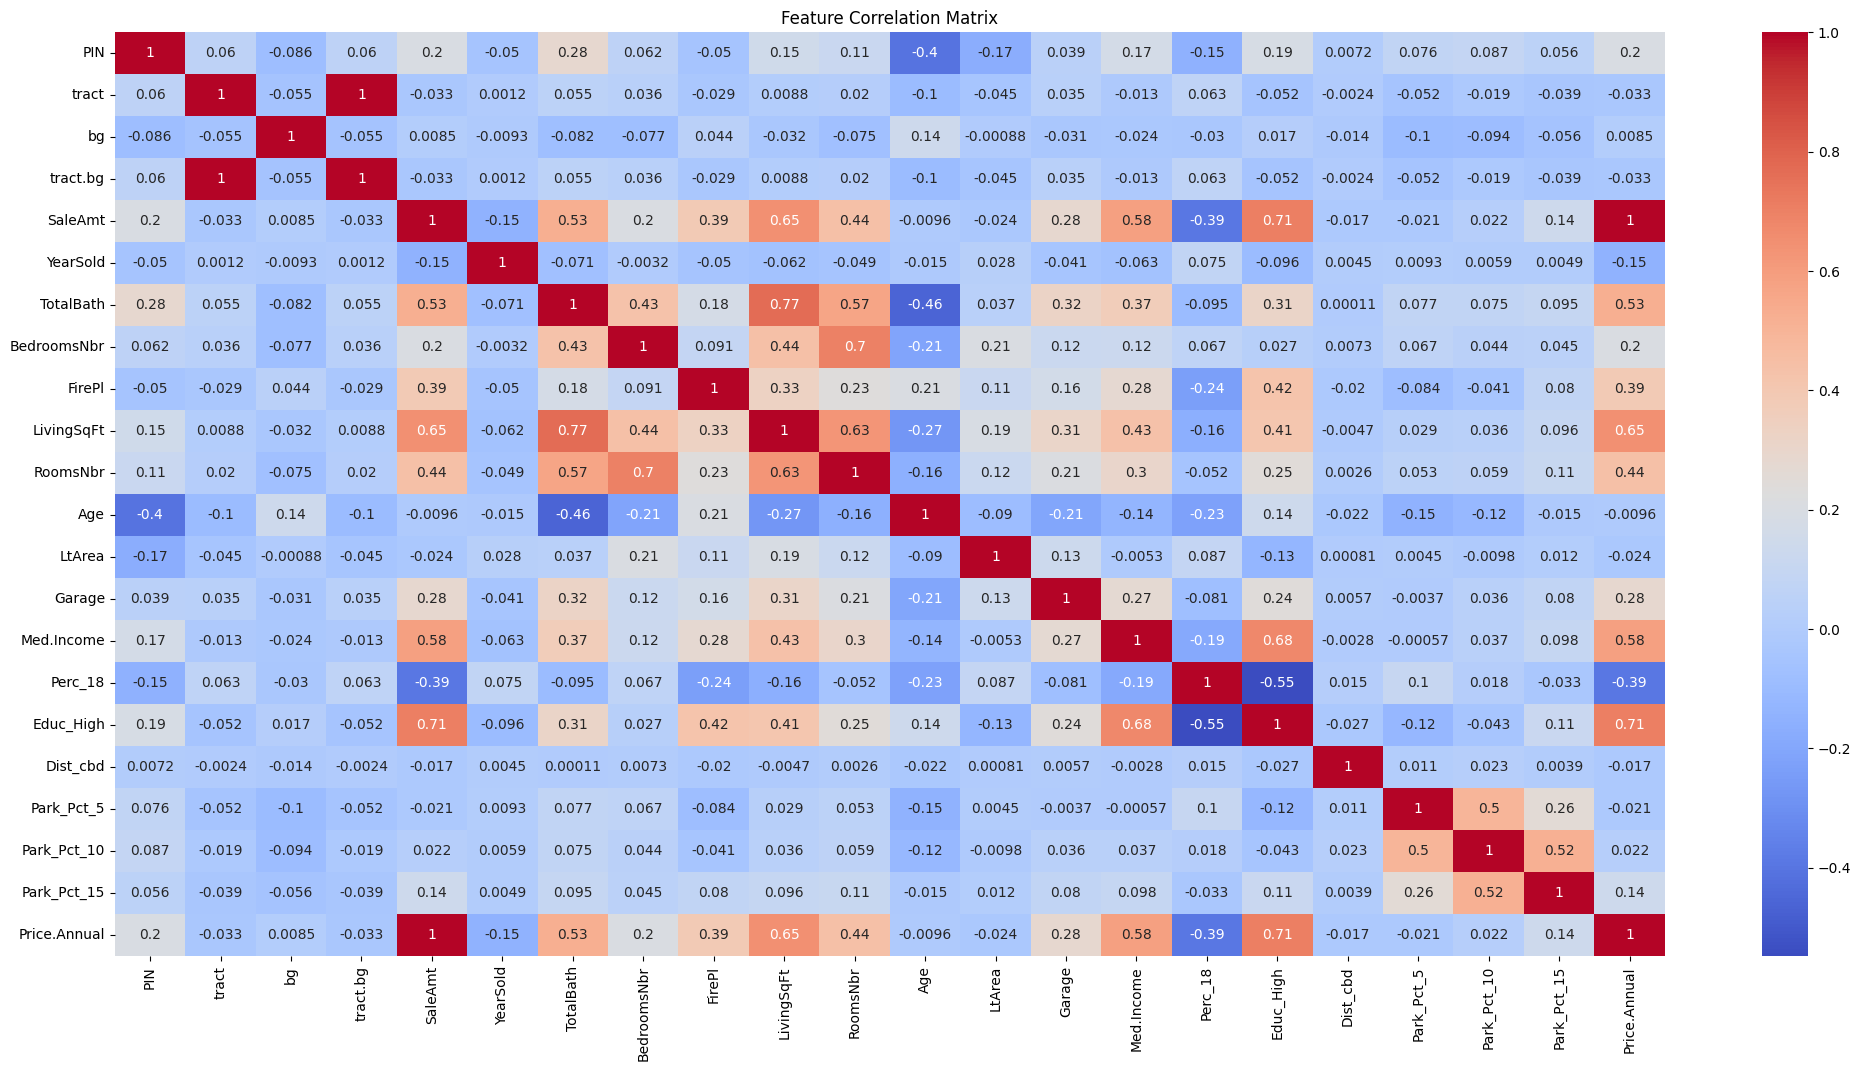

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Drop the specified columns
X = X.drop(['SaleAmt', 'tract.bg'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=38)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))


Training data shape: (38223, 19)
Test data shape: (9556, 19)
Random Forest Mean Absolute Error: 4322.507982120982
Random Forest R^2 Score: 0.8298156719571392


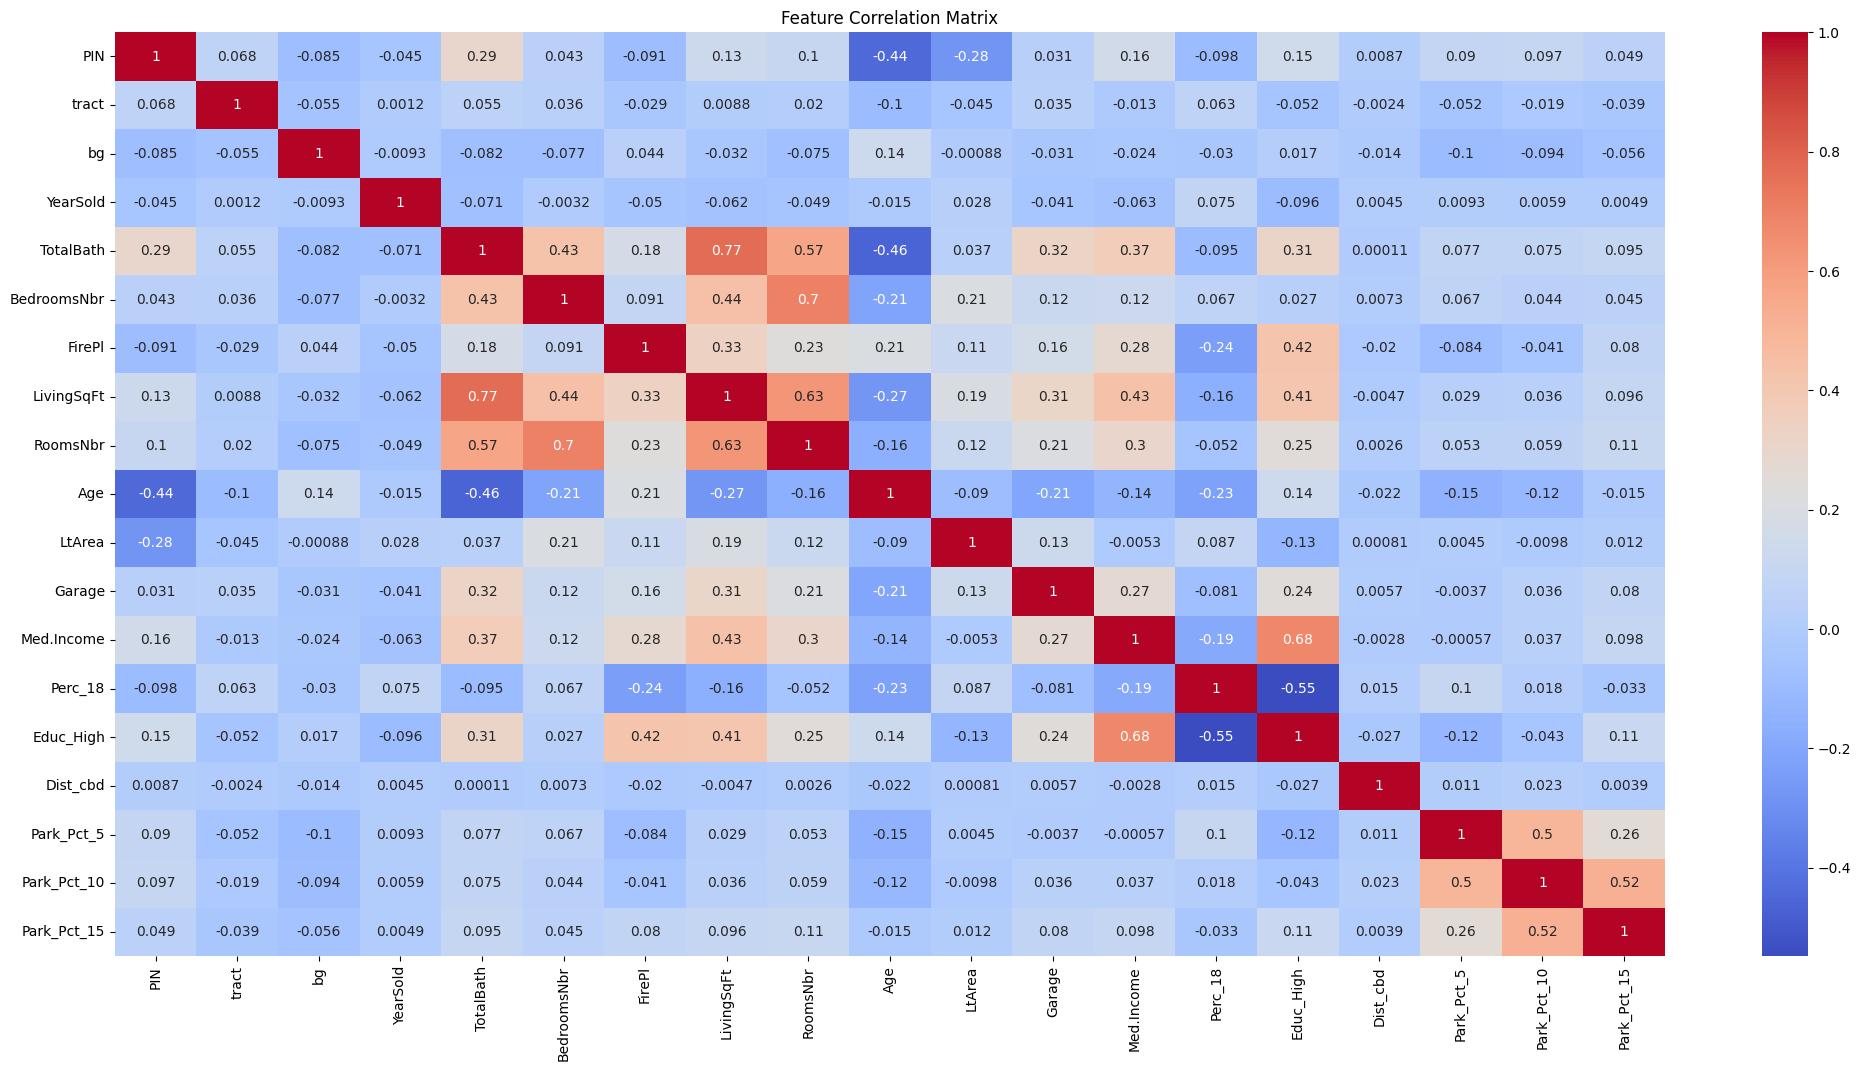

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [30]:
# Create interaction features
X['RoomSize_Avg'] = X['LivingSqFt'] / (X['RoomsNbr'] + 1e-5)
X['Income_Percentage'] = X['Med.Income'] / (X['Perc_18'] + 1e-5)

In [31]:
X.head(3)

,PIN,tract,bg,YearSold,TotalBath,BedroomsNbr,FirePl,LivingSqFt,RoomsNbr,Age,...,Garage,Med.Income,Perc_18,Educ_High,Dist_cbd,Park_Pct_5,Park_Pct_10,Park_Pct_15,RoomSize_Avg,Income_Percentage
0,160433918,8388,1,2005.0,1.0,2.0,0.0,0.960,4.0,12.0,...,1.0,43.561,0.314704,0.240882,0.002038,17.612663,7.220516,8.781955,0.239999,138.414663
1,160433918,8388,1,2008.0,1.0,2.0,0.0,0.960,4.0,12.0,...,1.0,43.561,0.314704,0.240882,0.002038,17.612663,7.220516,8.781955,0.239999,138.414663
2,160433985,8388,1,2009.0,3.0,4.0,0.0,1.385,7.0,10.0,...,1.0,43.561,0.314704,0.240882,0.008860,17.107411,7.261163,8.788971,0.197857,138.414663


# **Hyperparameter Tunning**

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = '/content/Housing01.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = data.drop(['Price.Annual'], axis=1)  # Replace 'target' with the actual target column name
y = data['Price.Annual']  # Replace 'target' with the correct target column name

# Step 2: Drop Highly Correlated Features
X_dropped = X.drop(['RoomSize_Avg', 'Educ_High','SaleAmt', 'tract.bg'], axis=1, errors='ignore')  # Drop features based on heatmap analysis

# Step 3: Create Interaction Features
X_dropped['RoomSize_Avg'] = X_dropped['LivingSqFt'] / (X_dropped['RoomsNbr'] + 1e-5)
X_dropped['Income_Percentage'] = X_dropped['Med.Income'] / (X_dropped['Perc_18'] + 1e-5)

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Define Parameter Grid for Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 7: Initialize and Run GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=2,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Step 8: Get the Best Model and Evaluate
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate MSE and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 41970995.33747334
R^2 Score: 0.8310336358867325


# **Random Forest**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = '/content/Housing01.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = data.drop(['Price.Annual'], axis=1)  # Replace 'target' with the actual target column name
y = data['Price.Annual']  # Replace 'target' with the correct target column name

# Step 2: Drop Highly Correlated Features
X_dropped = X.drop(['RoomSize_Avg', 'Educ_High','SaleAmt', 'tract.bg'], axis=1, errors='ignore')  # Drop features based on heatmap analysis

# Step 3: Create Interaction Features
X_dropped['RoomSize_Avg'] = X_dropped['LivingSqFt'] / (X_dropped['RoomsNbr'] + 1e-5)
X_dropped['Income_Percentage'] = X_dropped['Med.Income'] / (X_dropped['Perc_18'] + 1e-5)

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 1: Initialize the Random Forest model with the best hyperparameters
optimized_rf_model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Step 2: Train the optimized model on the training data
optimized_rf_model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_optimized = optimized_rf_model.predict(X_test)

# Step 4: Evaluate the model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Step 5: Print evaluation metrics
print("Optimized Random Forest Model Results:")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"R^2 Score: {r2_optimized}")

Optimized Random Forest Model Results:
Mean Squared Error (MSE): 41970995.33747334
Mean Absolute Error (MAE): 4376.128080523736
R^2 Score: 0.8310336358867325


In [22]:
import joblib

# Save the trained model to a file
model_filename = "optimized_rf_model.pkl"
joblib.dump(optimized_rf_model, model_filename)
print(f"Model saved to {model_filename}")

# Load the model later for predictions
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Example: Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"R^2 Score with loaded model: {r2_score(y_test, y_pred_loaded)}")


Model saved to optimized_rf_model.pkl
Model loaded successfully!
R^2 Score with loaded model: 0.8310336358867325


# **Feature Effectiveness**

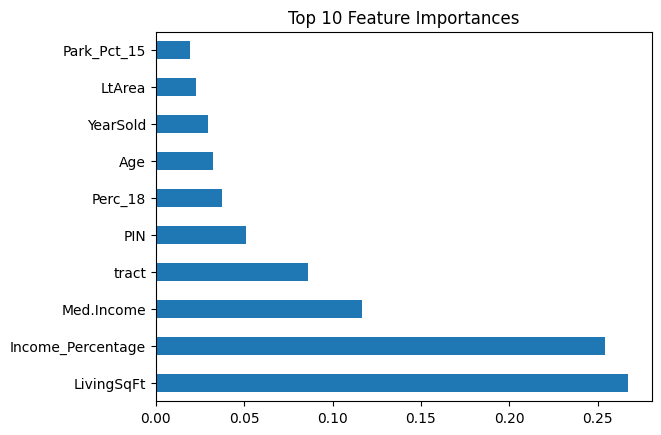

In [23]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(optimized_rf_model.feature_importances_, index=X_dropped.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

# **XG-Boost with Cross-Validation**

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform cross-validation with MAE as the scoring metric
cv_scores = cross_val_score(
    xgb_model,
    X_train,
    y_train,
    cv=5,  # Number of cross-validation folds
    scoring="neg_mean_absolute_error",  # Use negative MAE for scoring
    n_jobs=-1  # Use all available processors
)

# Convert negative scores to positive MAE
mae_scores = -cv_scores
mean_mae = mae_scores.mean()

# Print the cross-validated MAE
print("Cross-Validated MAE Scores:", mae_scores)
print("Mean Cross-Validated MAE:", mean_mae)

Cross-Validated MAE Scores: [4452.89616385 4402.3941965  4502.03105421 4427.71434877 4480.68104456]
Mean Cross-Validated MAE: 4453.143361576768


In [27]:
import joblib
from sklearn.metrics import r2_score

# Train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)  # Ensure the model is trained

# Save the trained model to a file
model_filename = "xg_model.pkl"
joblib.dump(xgb_model, model_filename)
print(f"Model saved to {model_filename}")

# Load the model later for predictions
loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

# Example: Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"R^2 Score with loaded model: {r2_score(y_test, y_pred_loaded)}")

Model saved to xg_model.pkl
Model loaded successfully!
R^2 Score with loaded model: 0.8331799471393657


# **Deep Learning Refinement**

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Step 1: Load the dataset
file_path = '/content/Housing01.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = data.drop(['Price.Annual'], axis=1)  # Replace 'target' with the actual target column name
y = data['Price.Annual']  # Replace 'target' with the correct target column name

# Drop the specified columns
X = X.drop(['SaleAmt', 'tract.bg'], axis=1)
# Create interaction features
X['RoomSize_Avg'] = X['LivingSqFt'] / (X['RoomsNbr'] + 1e-5)
X['Income_Percentage'] = X['Med.Income'] / (X['Perc_18'] + 1e-5)

# Step 1: Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Define the Neural Network Model
def build_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),  # Prevent overfitting
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    return model

# Step 3: Build the Model
input_dim = X_train.shape[1]
model = build_model(input_dim)

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,
    batch_size=32,
    verbose=1
)

# Step 5: Evaluate the Model
# Predict on test set
y_pred = model.predict(X_test)

# Calculate MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {test_mae}")

# Step 6: Save the Model
model.save("regression_nn_model.h5")
print("Model saved as 'regression_nn_model.h5'")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


956/956 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 26639.8574 - mae: 26639.8574 - val_loss: 26585.0059 - val_mae: 26585.0059
Epoch 2/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26707.2188 - mae: 26707.2188 - val_loss: 26485.7148 - val_mae: 26485.7148
Epoch 3/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 26523.8164 - mae: 26523.8164 - val_loss: 26339.2930 - val_mae: 26339.2930
Epoch 4/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26417.1523 - mae: 26417.1523 - val_loss: 26153.3652 - val_mae: 26153.3652
Epoch 5/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26146.6094 - mae: 26146.6094 - val_loss: 25925.1113 - val_mae: 25925.1113
Epoch 6/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25779.2773 - mae: 25779.2773 - val_loss: 25667.4121 - val_mae: 25667.4121
Epoch 7/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25736.2832 - mae: 25736.2832 - val_loss: 25369.5449 - val_mae: 25369.5449
Epoch 8/100
956/956 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25439

Mean Absolute Error on Test Set: 4810.499641875015
Model saved as 'regression_nn_model.h5'
